<a href="https://colab.research.google.com/github/diogoferraz/ai-mba/blob/main/colab/nlp_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia
!pip install wikipedia-api
!pip install wordcloud matplotlib

In [3]:
import string
import wikipedia
import wikipediaapi
import nltk
from nltk.probability import FreqDist
import re
import spacy
import sklearn
import pandas as pd
import textwrap
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Define a user agent string
user_agent = "NLP Practice MBA (diogocostaferraz@gmail.com)"

wiki = wikipediaapi.Wikipedia(
    user_agent=user_agent, # Add the user agent here
    language='pt',
    extract_format=wikipediaapi.ExtractFormat.WIKI
)

pagina = wiki.page("Processamento de linguagem natural")


print ("Página existe?: %s" % pagina.exists())

print ("Título da Página: %s" % pagina.title)

print ("Resumo da Página: %s" % pagina.summary)

resumo = pagina.summary
largura_maxima = 80

print("Resumo da Página:")
print(textwrap.fill(resumo, width=largura_maxima))
print(textwrap.fill(pagina.text,width=largura_maxima))

In [ ]:
nltk.download('punkt')

def contar_palavras_nltk(texto):
    tokens = nltk.word_tokenize(texto)
    return len(tokens)

total_palavras = contar_palavras_nltk(pagina.text)
print(f"O texto completo contém {total_palavras} palavras.")

total_palavras = contar_palavras_nltk(pagina.summary)
print(f"O texto resumo contém {total_palavras} palavras.")

corpus = pagina.text
corpus.split()

def contar_tokens(texto):
    tokens = texto.split()
    return len(tokens), tokens

# Usando a função
numero_tokens, lista_tokens = contar_tokens(pagina.text)
print(f"O texto contém {numero_tokens} tokens.")
print(f"Os primeiros 10 tokens são: {lista_tokens[:10]}")

#Capitalização com LOWER
tokens = corpus.lower().split()
tokens

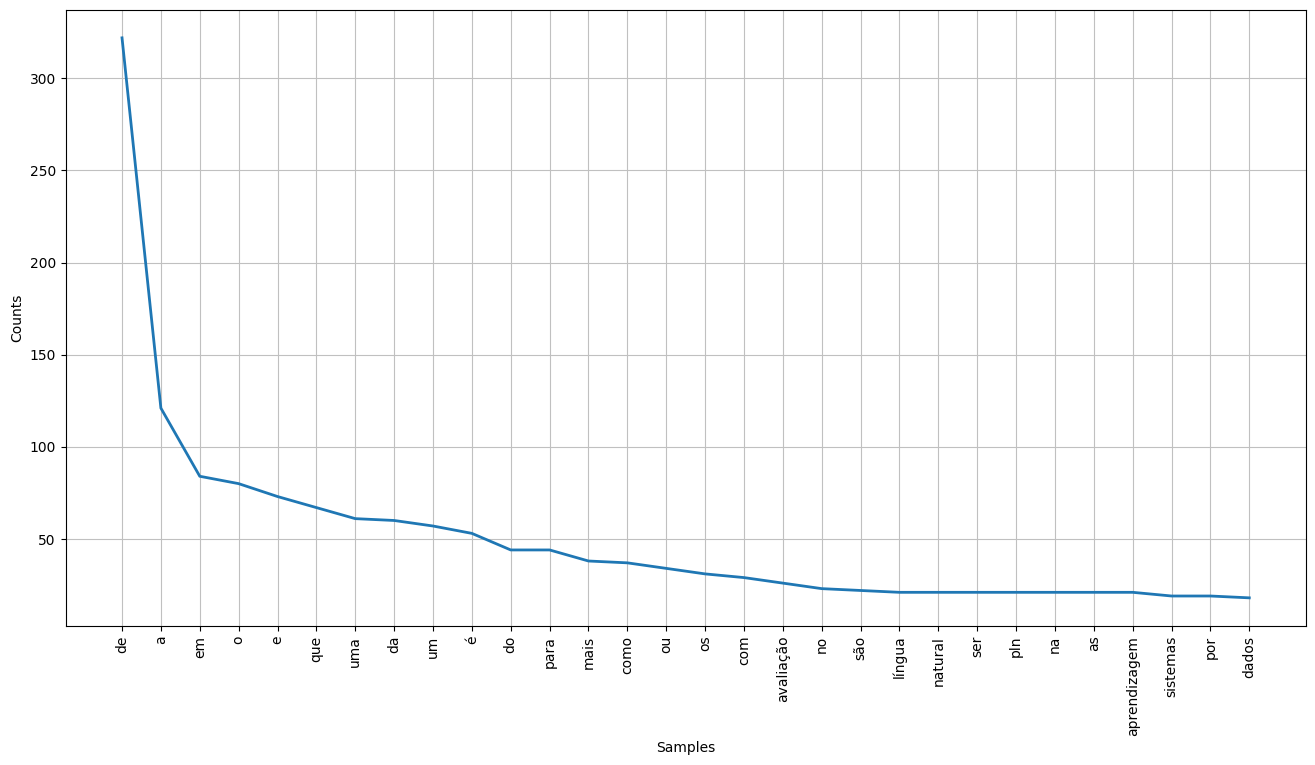

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
plt.figure(figsize=(16,8))
freq_palavras = FreqDist(tokens)
freq_palavras.plot(30)

#RETIRANDO STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


a à ao aos aquela aquelas aquele aqueles aquilo as às até com como da das de dela delas dele deles depois do dos e é ela elas ele eles em entre era eram éramos essa essas esse esses esta está estamos estão estar estas estava estavam estávamos este esteja estejam estejamos estes esteve estive estivemos estiver estivera estiveram estivéramos estiverem estivermos estivesse estivessem estivéssemos estou eu foi fomos for fora foram fôramos forem formos fosse fossem fôssemos fui há haja hajam hajamos hão havemos haver hei houve houvemos houver houvera houverá houveram houvéramos houverão houverei houverem houveremos houveria houveriam houveríamos houvermos houvesse houvessem houvéssemos isso isto já lhe lhes mais mas me mesmo meu meus minha minhas muito na não nas nem no nos nós nossa nossas nosso nossos num numa o os ou para pela pelas pelo pelos por qual quando que quem são se seja sejam sejamos sem ser será serão serei seremos seria seriam seríamos seu seus só somos sou sua suas também te

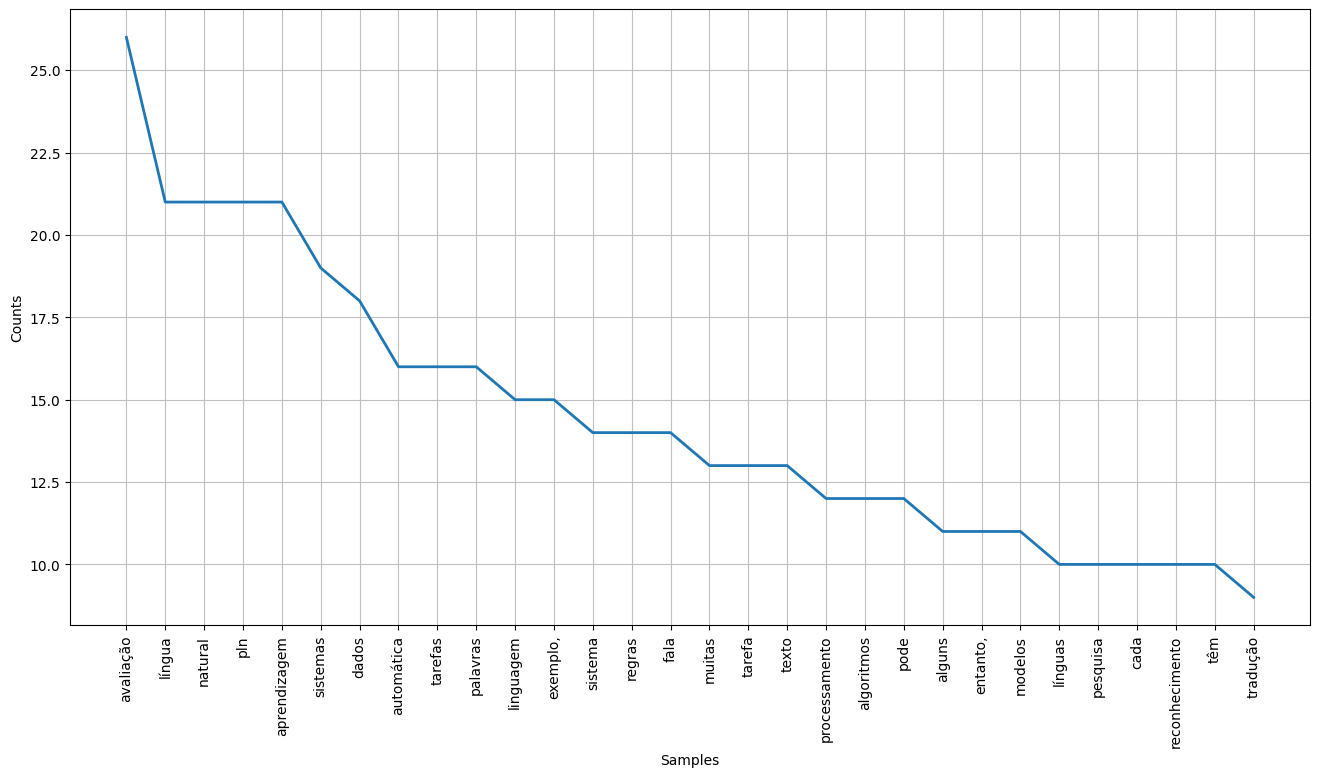

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
nltk.download('stopwords')
stopwords_portugues = stopwords.words('portuguese')
print(*stopwords_portugues)

tokens_sem_stopwords = [token for token in tokens if token not in stopwords_portugues]
tokens_sem_stopwords

plt.figure(figsize=(16,8))
freq_palavras = FreqDist(tokens_sem_stopwords)
freq_palavras.plot(30)


# Word Cloud

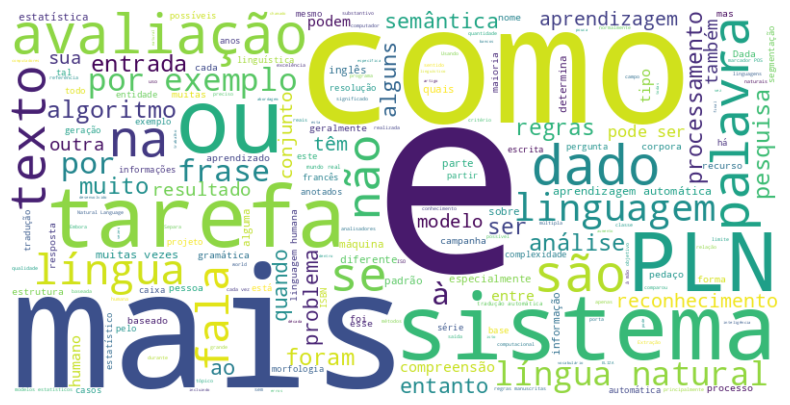

In [10]:
# Adicione palavras irrelevantes em português
stopwords = set(STOPWORDS)
stopwords.update(["da", "de", "do", "dos", "das", "em", "um", "uma", "para", "com", "que", "é", "o", "a", "os", "as"])

# Gere a nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(pagina.text)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()